# Wine Quality Predictions
* By Adam Harris and Fermin Garcia

## Imports

In [1]:
#import data tools
import numpy as np
import pandas as pd
# import data acquisition functions
import wrangle as w
# import exploration visualizations
import explore as e
# import ML models
import modeling as m
# import statistic tools
from scipy import stats

## Acquire

* The data was acquired from Data.World [https://data.world/food/wine-quality]
* The data was downloaded as csv files and combined into one csv locally
* The orginal size of the dataset was 6497 rows by 13 columns
* Each row represents one variant of the Portuguese "Vinho Verde" wine
* Each column represents one aspect of the chemical test of the wine

In [2]:
# Import acquired messy data from your acquire file here
df = w.acquire_data()

## Prepare

* The original csv files were combined into one dataset
* A new column was created to indicate if the wine was red or white, this new variable was then converted into a dummy variable
* We found a few outliers, but after doing some domain research, we found that the outliers were within the standard acceptable range for their tests
* We removed spaces from column names
* The dataset was split into train, validate and test groups (56%, 24%, 20%)
* Data was scaled using a MinMaxScaler in preparation for clustering

In [3]:
# Import your prepare function and use it to clean your data here
train, validate, test = w.wrangle()

## Explore

* Does alcohol content affect the quality score of the wine?
* Does the density of the wine affect the quality?
* Does the number of chlorides in the wine affect the quality?
* If we cluster the alcohol content into groups, will wines with high alcohol content have a higher quality score on average than wines with lower alcohol content?
* Does volatile acidity level have a correlation with quality of the wine?

## Question - Does alcohol content increase quality?

<Figure size 1600x1200 with 0 Axes>

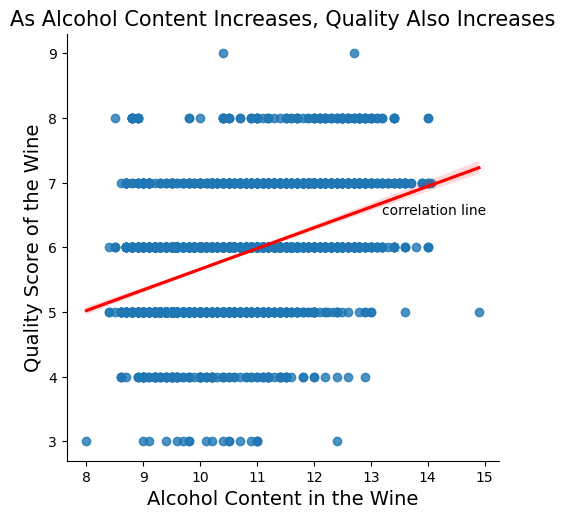

In [4]:
# display a plot of alcohol content by quality
e.get_plot_alcohol_by_quality(train)

#### Is there a statistial correlation?
- alcohol is a continuous variable with right skew
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [5]:
# run a statistical test on alcohol and quality
e.check_hypothesis(train, 'quality', 'alcohol', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and alcohol are correlated.
The correlation coefficient between quality and alcohol is 0.44 with a p-value of 0.0000
_______________________________________________________


#### We are able to conclude that there is a linear correlation between quality and density, with a correlation coefficient of 0.44 (as alcohol goes up, quality goes up)

## Question - Does density have an effect on quality?

<Figure size 1600x1200 with 0 Axes>

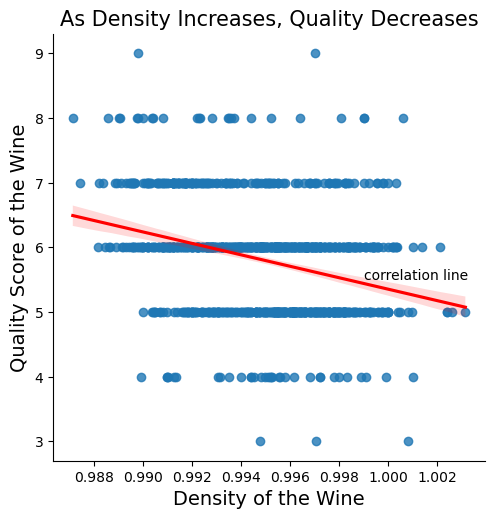

In [6]:
# display a plot of density by quality
e.get_plot_density_by_quality(train)

#### Is there a statistial correlation?
- density is a continuous variable
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [7]:
# run a statistical test on density and quality
e.check_hypothesis(train, 'quality', 'density', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and density are correlated.
The correlation coefficient between quality and density is -0.32 with a p-value of 0.0000
_______________________________________________________


#### We are able to conclude that there is a linear correlation between quality and density, with a correlation coefficient of -0.32 (as density goes up, quality goes down)

## Question - Do chlorides have a linear correlation to quality?

<Figure size 1600x1200 with 0 Axes>

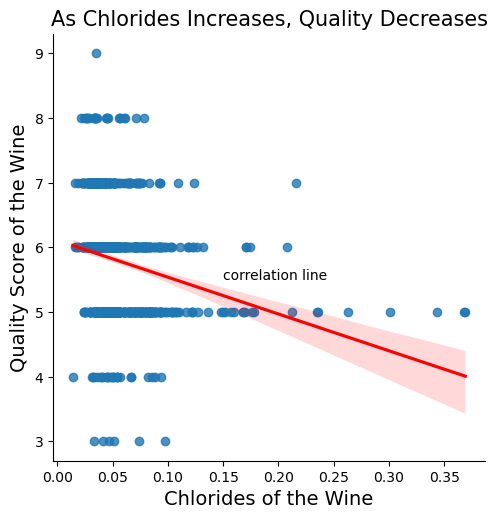

In [8]:
# display a plot of chlorides by quality
e.get_plot_chlorides_by_quality(train)

#### Is there a statistial correlation?
- chlorides is a continuous variable
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and chlorides
- α = 0.05

In [9]:
# run a statistical test on chlorides and quality
e.check_hypothesis(train, 'quality', 'chlorides', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and chlorides are correlated.
The correlation coefficient between quality and chlorides is -0.30 with a p-value of 0.0000
_______________________________________________________


#### We are able to conclude that there is a linear correlation between quality and chlorides, with a correlation coefficient of -0.30 (as chlorides goes up, quality goes down)

## Clustering Question - If we cluster alcohol content, will wines with high alcohol content have a higher quality score than wines with lower alcohol content?

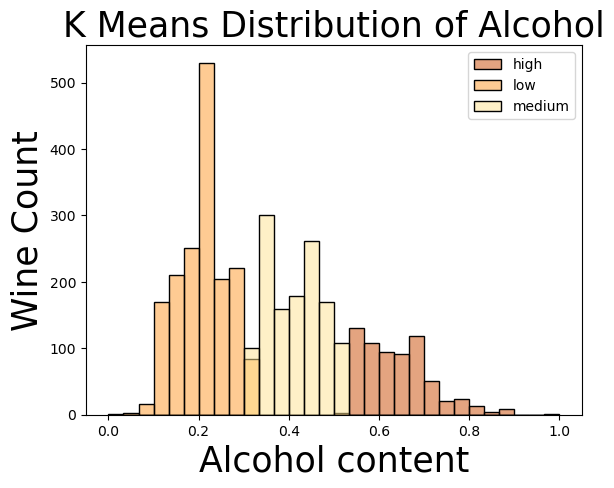

In [10]:
# display a plot of wine count by alcohol content clusters
e.plot_kmeans_histogram()

#### Let's run a statistical test
- H$_0$ : Wines with high alcohol content have <= quality score than wines with medium or lower alcohol content
- H$_a$ : Wines with high alcohol content have > quality score than wines with medium or lower alcohol content
- This will be a 2-sample 1-tailed t-test

In [11]:
# run a statistical test on the alcohol clusters
e.give_hypothesis_alcohol()

We reject null hypothesis


#### We are able to conclude that if a wine has a high alcohol content, it will have a higher quality score on average than wines with medium or low alcohol content

## Question - Does Volatile Acidity level affect the quality score?

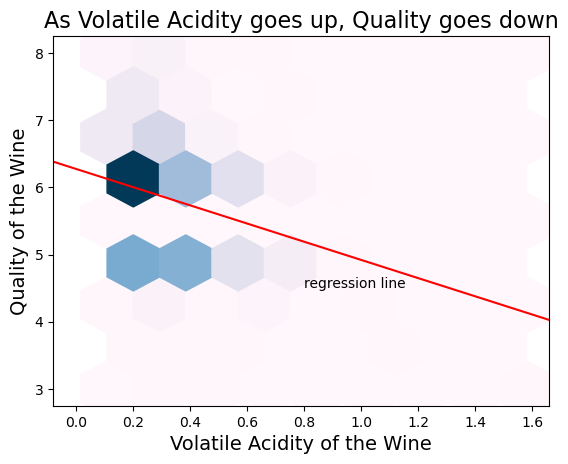

In [12]:
# display a plot of volatile acidity by quality
e.get_plot_volatile_acidity_by_quality(train)

#### Is there a statistial correlation?
- volatile acidity is a continuous variable
- quality appears to be a ordinal variable, non parametric 
- we are looking to do a spearman test
- H$_0$ : There is no correlation
- H$_a$ : There is a linear correlation between quality and volatile acidity
- α = 0.05

In [13]:
# run a statistical test on volatile acidity and quality
e.check_hypothesis(train, 'quality', 'volatile_acidity', test=stats.spearmanr)

Since the p-value is less than 0.05, 
we can reject the null hypothesis and conclude that quality and volatile_acidity are correlated.
The correlation coefficient between quality and volatile_acidity is -0.25 with a p-value of 0.0000
_______________________________________________________


#### We can conclude that there is a negative linear correlation between volatile acidity and quality. When volatile acidity goes up, quality goes down

## Exploration Summary
* We found that as alcohol content increases, the quality score also increases
* We also found that wines with a high alcohol content have a higher quality score on average than wines with lower alcohol content
* We found that as the density of the wine increases, the quality score decreases
* We found that as the amount of chlorides increases, the quality score decreases
* We found that as the volatile acidity of the wine increases, the quality score decreases
* Because of our findings we selected alcohol, density, chlorides, and volatile acidity as our modeling features, the KBest algorithm gave us the same features

## Modeling

### Introduction
* Since we are approaching this as a regression problem we will be looking at the metrics:
* Root Mean Squared Error (RMSE): which gives the total error in the predictions from the observed quality scores
* R$^2$: which is the proportion of variance from the mean value that is explainable by our model

In [14]:
# split train, validate and test into X and y variable groups
X_train, y_train, X_validate, y_validate, X_test, y_test = \
    e.get_x_y_train_val_test(train,validate,test)

# convert the y-variable lists into dataFrames
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

### Baseline Model
- calculated by geting the mean of quality scores from the training dataset

In [15]:
# retrieve metrics for our baseline model
m.get_baseline_model(y_train)

Baseline Model (mean)
RMSE for baseline model: 0.86627299
R^2 for baseline model: 0.0


### Best 3 Models
* Our best models were the Polynomial Regressor, Ordinary Least Squares, and Generalized Linear Model
* We performed tests using feature sets derived from the KBest and Recursive Feature Elimination algorithms

#### We selected the features 'volatile_acidity', 'chlorides', 'density', 'alcohol' for our first set of models, which is the same as what the kbest algorithm returned

In [16]:
# assign kbest feature set to a variable
f_features_kbest = ['volatile_acidity', 'chlorides', 'density', 'alcohol']

#### We selected the features 'volatile_acidity', 'chlorides', 'density', 'sulphates' for our second set of models from the RFE algorithm

In [17]:
# assign rfe feature set to a variable
f_features_rfe = ['volatile_acidity', 'chlorides', 'density', 'sulphates']

### Polynomial Regressor - kbest features

In [18]:
# retrieve a polynomial model and metrics using the kbest feature set
lm2, X_train_degree2, X_validate_degree2, X_test_degree2 = \
    m.get_model_polynomial(X_train, X_validate, X_test,
                           y_train, y_validate, y_test,
                           f_features_kbest)

model : Polynomial-kbest
RMSE_train: 0.7373
RMSE_validate: 0.7526
difference: 0.01535
R2: 0.2841


### Ordinary Least Squares - kbest features

In [19]:
# retrieve an ordinary least squares model and metrics using the kbest feature set
lm = m.get_model_ols(X_train, X_validate, X_test,
                     y_train, y_validate, y_test,
                     f_features_kbest)

model : Ordinary Lease Squares-kbest
RMSE_train: 0.7435
RMSE_validate: 0.7559
difference: 0.01244
R2: 0.2779


### Generalized Linear Model - Power 1 - kbest features

In [20]:
# retrieve a generalized linear model (tweedie regressor) and print the metrics
# using the kbest feature set
glm_pow1 = m.get_model_glm(X_train, X_validate, X_test,
                           y_train, y_validate, y_test,
                           f_features_kbest)

model : Generalized Linear Model-power 1-kbest
RMSE_train: 0.7478
RMSE_validate: 0.7591
difference: 0.01133
R2: 0.272


### Polynomial Regressor - rfe features

In [21]:
# retrieve a polynomial model and metrics using the kbest feature set
lm2_rfe, X_train_degree2_rfe, X_validate_degree2_rfe, X_test_degree2_rfe = \
    m.get_model_polynomial(X_train, X_validate, X_test,
                           y_train, y_validate, y_test,
                           f_features_rfe)

model : Polynomial-kbest
RMSE_train: 0.7787
RMSE_validate: 0.7848
difference: 0.006072
R2: 0.2217


### Test Model
* We chose to use the Polynomial Regressor model with kbest features on our test data
* This model had both the lowest RMSE score, and the highest R$^2$ values out of all of our models

In [22]:
# make predictions using the test data and print results
y_test = m.get_polynomial_test(lm2, X_test_degree2, y_test)

Polynomial Model on Test Data
RMSE on test data: 0.74790113
R^2 value: 0.266


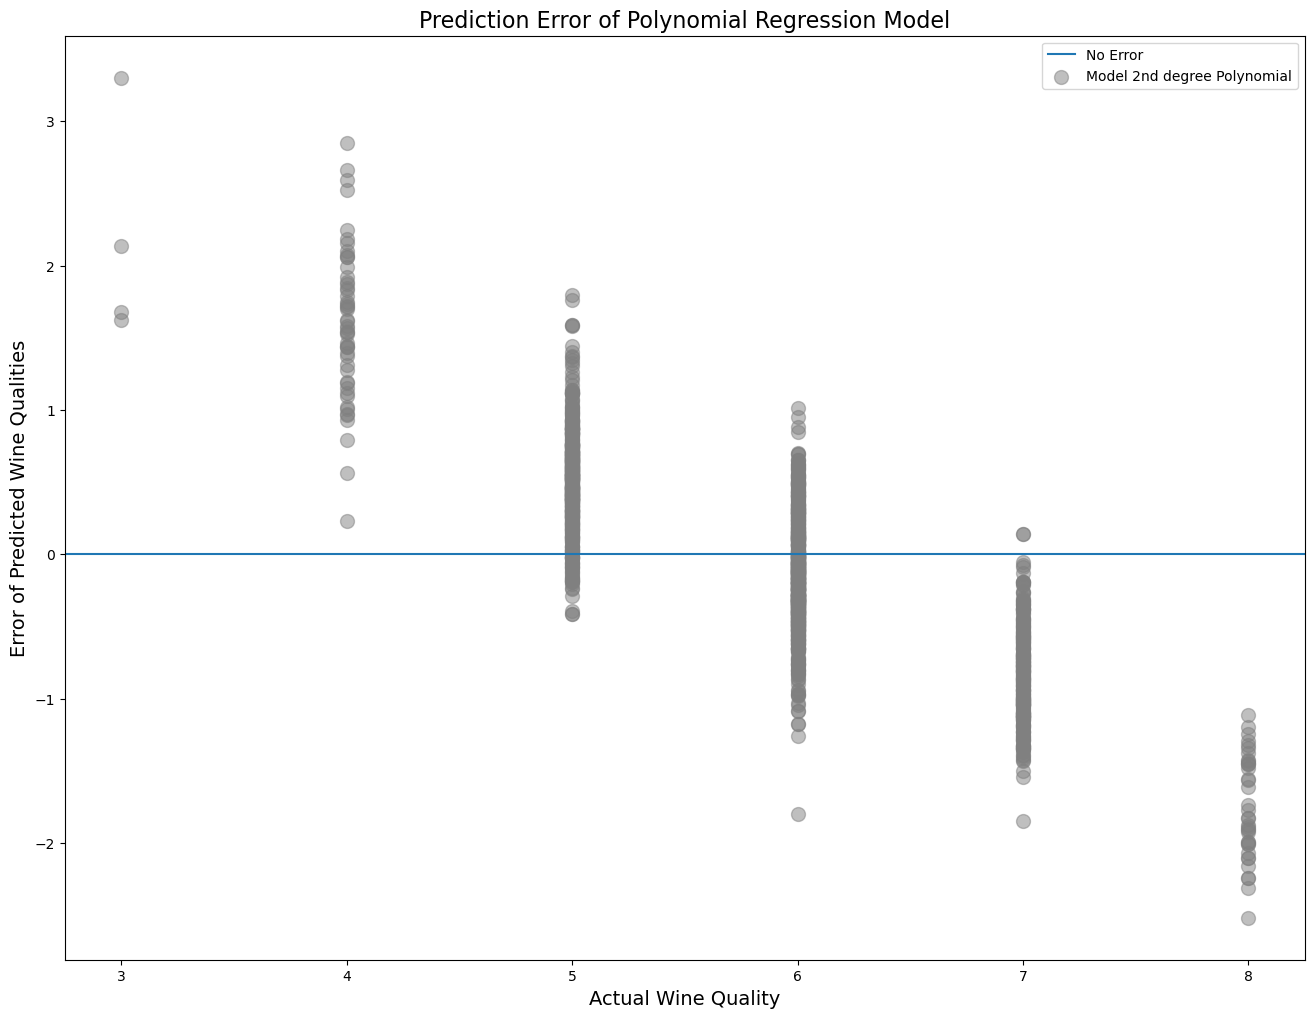

In [23]:
# display a plot of test data prediction residuals
m.get_pred_error_plot(y_test)

### Modeling Wrap 
* Our best model (Polynomial Regressor) was able to account for 27% of the variance from the mean (R$^2$)
* On the test data, our average error amount (RMSE) was less than 0.75
* Our model performed better than the baseline in both metrics

## Conclusion

### Summary
* Our model was able to predict the quality score of a wine with a margin of error less than 0.75 points
* Alcohol content was the highest driving factor for quality

### Recommendations
* Looking at the alcohol content can give a good guess at the wine's quality

### Next Steps
* We would like to acquire data on the wine age, the region it was produced at, and what technique was used to make the wine for a more complete picture of each wine.